<a href="https://colab.research.google.com/github/VanKoh01/us-dba-02/blob/main/regresion2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-learn

# Regresion Lineal (Horas de sueño - Km corridos)

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
# Datos de entrenamiento: [Km, Edad, Sexo]
# Sexo: 0 = Mujer, 1 = Hombre
X = [
    [5.0, 22, 1], [5.0, 30, 0], [5.0, 40, 1], [5.0, 48, 0],
    [10.0, 20, 1], [10.0, 25, 0], [10.0, 38, 1], [10.0, 45, 0],
    [10.0, 50, 1], [8.0, 33, 0], [9.5, 36, 1], [6.0, 44, 0],
    [7.5, 26, 1], [6.5, 35, 0], [12.0, 24, 1], [4.5, 42, 0],
    [9.0, 29, 1], [11.0, 31, 0], [5.5, 47, 1], [8.5, 34, 0]
]

# Horas de sueño correspondientes (etiquetas)
y = [7, 8, 6, 7, 9, 10, 7.5, 8.5, 7.2, 8, 9.3, 7.8,
          8.2, 7.1, 9.5, 6.8, 8.9, 9.2, 7.0, 8.4]

In [5]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X,y)

LinearRegression()

In [6]:
#horas de sueño para una persona que corrió 10km, tiene 28 años, masculino
prediccion = modelo_lineal.predict([[10.0, 28, 1]])

In [7]:
print(f"Predicción de horas de sueño: {prediccion[0]:.2f}")

Predicción de horas de sueño: 8.72


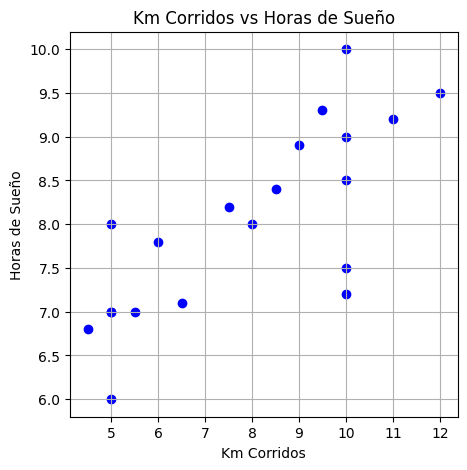

In [8]:
import matplotlib.pyplot as plt
km = [[fila[0]] for fila in X]
hrs = y

plt.figure(figsize=(5,5))
plt.scatter(km, hrs, color="blue")
plt.title('Km Corridos vs Horas de Sueño')
plt.xlabel('Km Corridos')
plt.ylabel('Horas de Sueño')
plt.grid(True)
plt.show()



Regresión Lógica

In [9]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [10]:
y_logica = [1 if valor > 8 else 0 for valor in y] # horas de sueño en clases: 1 si duerme +>8 horas, 0 en cuando no

In [11]:
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X, y_logica)


LogisticRegression()

In [12]:
prediccion_logica = modelo_logistico.predict([[10.0, 28, 1]])
print("¿Descansa más de 8 horas?:", "Sí" if prediccion_logica[0] == 1 else "No")

¿Descansa más de 8 horas?: Sí


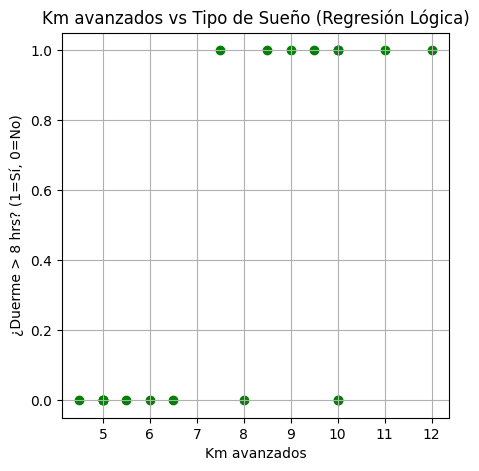

In [13]:
 #Gráfica simple para delimitar
km_valores = [fila[0] for fila in X]
plt.figure(figsize=(5,5))
plt.scatter(km_valores, y_logica, color="green")
plt.title('Km avanzados vs Tipo de Sueño (Regresión Lógica)')
plt.xlabel('Km avanzados')
plt.ylabel('¿Duerme > 8 hrs? (1=Sí, 0=No)')
plt.grid(True)
plt.show()

Árbol de Decisión

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=0)
modelo_arbol.fit(X, y_logica)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
# Predicción con datos de prueba para el arbol de desicion
prediccion_arbol = modelo_arbol.predict([[10.0, 28, 1]])
print("Árbol de decisión - ¿Duerme más de 8 horas?:", "Sí" if prediccion_arbol[0] == 1 else "No")

Árbol de decisión - ¿Duerme más de 8 horas?: Sí


In [17]:
from sklearn.tree import export_text
estructura = export_text(modelo_arbol, feature_names=["Km", "Edad", "Sexo"])
print("\nEstructura árbol de decisiones:\n")
print(estructura)


Estructura árbol de decisiones:

|--- Km <= 7.00
|   |--- class: 0
|--- Km >  7.00
|   |--- Edad <= 32.00
|   |   |--- class: 1
|   |--- Edad >  32.00
|   |   |--- Km <= 8.25
|   |   |   |--- class: 0
|   |   |--- Km >  8.25
|   |   |   |--- class: 1



Bosque aleatorio


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Entrenamiento de bosque aleatorio
modelo_bosque = RandomForestClassifier(n_estimators=100, random_state=0)
modelo_bosque.fit(X, y_logica)

RandomForestClassifier(random_state=0)

In [20]:
prediccion_bosque = modelo_bosque.predict([[10.0, 28, 1]])
print("Bosque aleatorio - ¿Duerme más de 8 horas?:", "Sí" if prediccion_bosque[0] == 1 else "No")

Bosque aleatorio - ¿Duerme más de 8 horas?: Sí


In [21]:
from sklearn.metrics import accuracy_score

#accuracy con datos de entrenamiento
#se pueden añadir mas, pero se vuelve inestable
#debug posterior para reciclar
arbol_acc = accuracy_score(y_logica, modelo_arbol.predict(X))
bosque_acc = accuracy_score(y_logica, modelo_bosque.predict(X))

print(f"Precisión del Árbol de Decisión: {arbol_acc*100:.1f}%")
print(f"Precisión del Bosque aleatorio: {bosque_acc*100:.1f}%")

Precisión del Árbol de Decisión: 90.0%
Precisión del Bosque aleatorio: 100.0%


In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


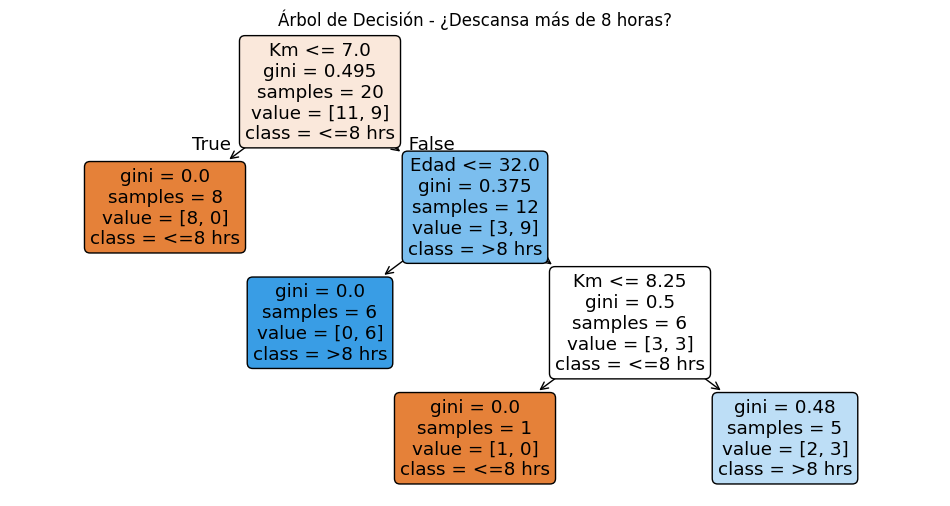

In [23]:
plt.figure(figsize=(12, 6))
plot_tree(modelo_arbol,
          feature_names=["Km", "Edad", "Sexo"],
          class_names=["<=8 hrs", ">8 hrs"],
          filled=True, rounded=True)
plt.title("Árbol de Decisión - ¿Descansa más de 8 horas?")
plt.show()

In [24]:
# Nuevos datos para ampliar el dataset
X_extra = [
    [7.0, 21, 1], [4.5, 50, 0], [6.5, 27, 0], [9.0, 29, 1],
    [3.0, 60, 1], [12.0, 31, 0], [11.0, 23, 1], [8.5, 35, 0],
    [5.5, 39, 0], [6.2, 42, 1], [7.3, 26, 1], [8.8, 46, 0],
    [9.7, 32, 1], [7.9, 37, 0], [4.0, 52, 0], [10.5, 41, 1]
]

# Horas de sueño correspondientes
y_extra = [
    8, 6.5, 9, 9.5,
    5.8, 10.2, 9.8, 8.7,
    7.2, 7.6, 8.5, 8.9,
    9.1, 8.3, 6.0, 9.4
]

# Agrega los datos nuevos a las listas existentes
X.extend(X_extra)
y.extend(y_extra)

# Etiquetas binarias: 1 si duerme > 8 horas, 0 en caso contrario
y_logica = [1 if valor > 8 else 0 for valor in y]

In [25]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(max_depth=6, random_state=0)
modelo_arbol.fit(X, y_logica)


DecisionTreeClassifier(max_depth=6, random_state=0)

In [26]:
from sklearn.metrics import accuracy_score

print("\n=== Evaluación ===")
print(f"Precisión del Árbol de Decisión: {accuracy_score(y_logica, modelo_arbol.predict(X)) * 100:.1f}%")
print(f"Precisión del Random Forest: {accuracy_score(y_logica, modelo_bosque.predict(X)) * 100:.1f}%")


=== Evaluación ===
Precisión del Árbol de Decisión: 97.2%
Precisión del Random Forest: 88.9%


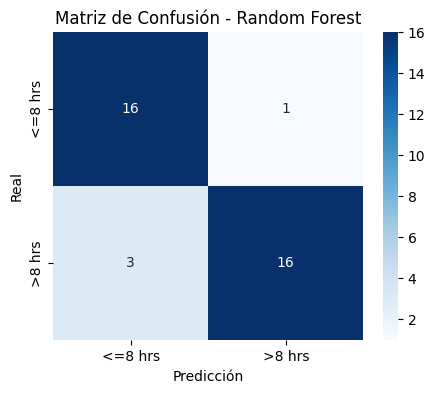

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_logica, modelo_bosque.predict(X)),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=["<=8 hrs", ">8 hrs"],
            yticklabels=["<=8 hrs", ">8 hrs"])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [28]:
from sklearn.metrics import classification_report

print("\nReporte de Clasificación:")
print(classification_report(y_logica, modelo_bosque.predict(X),
                            target_names=["<=8 hrs", ">8 hrs"]))


Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

     <=8 hrs       0.84      0.94      0.89        17
      >8 hrs       0.94      0.84      0.89        19

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



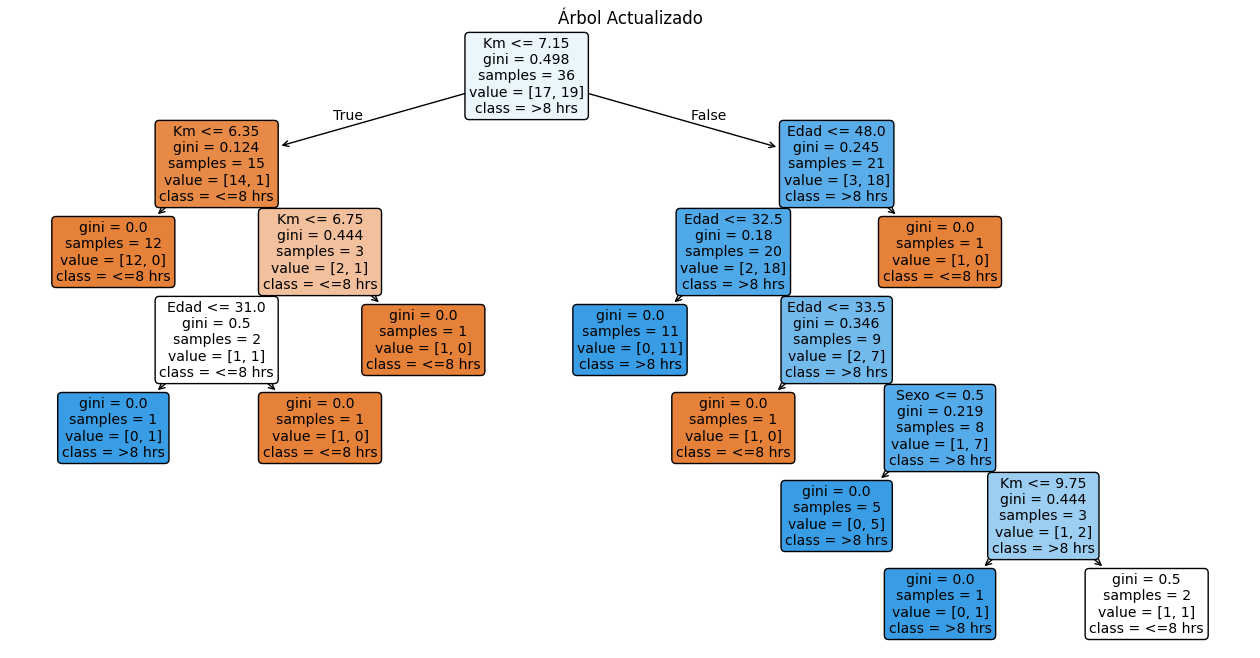

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(modelo_arbol,
          feature_names=["Km", "Edad", "Sexo"],
          class_names=["<=8 hrs", ">8 hrs"],
          filled=True, rounded=True)
plt.title("Árbol Actualizado")
plt.show()
